In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import matplotlib.ticker as ticker

mpl.rcParams.update({'font.size': 16})


In [2]:
data_vars = {
    'reco_energy':'FLERCNN_energy', 
    'reco_coszen':'FLERCNN_coszen', 
    'reco_z':'FLERCNN_vertex_z', 
    'reco_rho':'FLERCNN_vertex_rho36', 
    'pid':'FLERCNN_prob_track', 
    'nDOM':'FLERCNN_nDOM',
    'l7_muon_classifier_prob_nu':'FLERCNN_BDT_ProbNu',
    'L7_CoincidentMuon_Variables.n_top15':'L7_CoincidentMuon_Variables.n_top15',
    'L7_CoincidentMuon_Variables.n_outer':'L7_CoincidentMuon_Variables.n_outer',
    'L4_NoiseClassifier_ProbNu':'L4_NoiseClassifier_ProbNu',
    'L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms':'L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms'
}

neutrino_vars = {
    'true_energy':'MCInIcePrimary.energy', 
    'true_coszen':'MCInIcePrimary.dir.coszen', 
    'pdg_code':'MCInIcePrimary.pdg_encoding', 
    'interaction':'I3MCWeightDict.InteractionType', 
    'weighted_aeff':'weighted_aeff', 
    'reco_energy':'FLERCNN_energy', 
    'reco_coszen':'FLERCNN_coszen', 
    'reco_z':'FLERCNN_vertex_z', 
    'reco_rho':'FLERCNN_vertex_rho36', 
    'pid':'FLERCNN_prob_track',
    'nDOM':'FLERCNN_nDOM', 
    'linear_fit_maccqe':'GENIE_linear_fit_MaCCQE', 
    'quad_fit_maccqe':'GENIE_quad_fit_MaCCQE', 
    'linear_fit_maccres':'GENIE_linear_fit_MaCCRES', 
    'quad_fit_maccres':'GENIE_quad_fit_MaCCRES', 
    'starting_event':'MCDeepCoreStartingEvent', 
    'l7_muon_classifier_prob_nu':'FLERCNN_BDT_ProbNu',
    'L7_CoincidentMuon_Variables.n_top15':'L7_CoincidentMuon_Variables.n_top15',
    'L7_CoincidentMuon_Variables.n_outer':'L7_CoincidentMuon_Variables.n_outer',
    'L4_NoiseClassifier_ProbNu':'L4_NoiseClassifier_ProbNu',
    'L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms':'L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms',
    'dis':'I3GENIEResultDict.dis',
    'bjorken_y':'I3GENIEResultDict.y',
    'ReferenceWeight':'ReferenceWeight'
}

muon_vars = {
    'true_coszen':'MCInIcePrimary.dir.coszen', 
    'initial_weights':'I3MCWeightDict.weight', 
    'reco_energy':'FLERCNN_energy', 
    'reco_coszen':'FLERCNN_coszen', 
    'reco_z':'FLERCNN_vertex_z', 
    'reco_rho':'FLERCNN_vertex_rho36', 
    'pid':'FLERCNN_prob_track', 
    'nDOM':'FLERCNN_nDOM', 
    'l7_muon_classifier_prob_nu':'FLERCNN_BDT_ProbNu',
    'L7_CoincidentMuon_Variables.n_top15':'L7_CoincidentMuon_Variables.n_top15',
    'L7_CoincidentMuon_Variables.n_outer':'L7_CoincidentMuon_Variables.n_outer',
    'L4_NoiseClassifier_ProbNu':'L4_NoiseClassifier_ProbNu',
    'L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms':'L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms'
}

genie_vars = {
    "GENIEWeight": "GENIEWeight",
    "GENIE_rw_MaCCRES_0": "GENIE_rw_MaCCRES_0",
    "GENIE_rw_MaCCRES_1": "GENIE_rw_MaCCRES_1",
    "GENIE_rw_MaCCRES_2": "GENIE_rw_MaCCRES_2",
    "GENIE_rw_MaCCRES_3": "GENIE_rw_MaCCRES_3",
    "GENIE_rw_MaCCQE_0": "GENIE_rw_MaCCQE_0",
    "GENIE_rw_MaCCQE_1": "GENIE_rw_MaCCQE_1",
    "GENIE_rw_MaCCQE_2": "GENIE_rw_MaCCQE_2",
    "GENIE_rw_MaCCQE_3": "GENIE_rw_MaCCQE_3",
}

In [3]:
def pisa_hdf_to_pandas(path, variable_dict, is_genie=False, return_metadata=False):
    
    split_dfs = []
    metadata = dict()
    with h5py.File(path) as h5_file:
        for name in h5_file:
            print(name)
            
            df = pd.DataFrame()
            data = h5_file[name]
            for variable in vars_to_read:
                df[variable] = np.array(data[vars_to_read[variable]])
            
            if is_genie:
                if "_cc" in name:
                    interaction = "cc"
                elif "_nc" in name:
                    interaction = "nc"
                else:
                    raise ValueError("Not a GENIE file")
                if "bar" in name:
                    nubar = "nubar"
                else:
                    nubar = "nu"
                if "nue" in name:
                    flavor = "nue"
                elif "numu" in name:
                    flavor = "numu"
                elif "nutau" in name:
                    flavor = "nutau"
                else:
                    raise ValueError("Cannot recognize flavor")
                df["interaction"] = interaction
                df["nubar"] = nubar
                df["flavor"] = flavor

            split_dfs.append(df)
        if return_metadata:
            metadata = dict(h5_file.attrs)
    
    combined_df = pd.concat(split_dfs, ignore_index=True)

    if is_genie:
        combined_df["interaction"] = pd.Categorical(combined_df["interaction"])
        combined_df["nubar"] = pd.Categorical(combined_df["nubar"])
        combined_df["flavor"] = pd.Categorical(combined_df["flavor"])
    
    if return_metadata:
        return combined_df, metadata

    return combined_df

In [4]:
vars_to_read = dict()
vars_to_read.update(neutrino_vars)
#vars_to_read.update(gbm_vars)
#vars_to_read.update(santa_hits_vars)
#vars_to_read.update(genie_vars)

filepath='/afs/ifh.de/user/a/akumar/lustre/data/oscNext/flercnn_sample_analysis/pisa_hdf5/flercnn/'
#filepath+='oscNext_pisa_genie_0000_flercnn.hdf5'
filepath+='oscNext_pisa_genie_1154_flercnn.hdf5' #nominal

neutrino_df = pisa_hdf_to_pandas(
    filepath,
    vars_to_read,
    is_genie=True
)

nue_cc
nue_nc
nuebar_cc
nuebar_nc
numu_cc
numu_nc
numubar_cc
numubar_nc
nutau_cc
nutau_nc
nutaubar_cc
nutaubar_nc


In [5]:
E_min = 1. #5
E_max = 10000. #100
CT_min = -1
CT_max = 1 #0
# L7 and analysis cuts

cuts=((neutrino_df["reco_z"] > -495.) & (neutrino_df["reco_z"] < -225.) & (neutrino_df["reco_rho"] < 200.) 
    & ( neutrino_df["L7_CoincidentMuon_Variables.n_top15"] < 0.5 ) 
    & ( neutrino_df["L7_CoincidentMuon_Variables.n_outer"] < 7.5 ) 
    & ( neutrino_df["L5_SANTA_DirectPulsesHitMultiplicity.n_hit_doms"] > 2.5) 
    & (neutrino_df["nDOM"] >=7) & (neutrino_df["l7_muon_classifier_prob_nu"] >=0.8) )

# binning cut

cuts = (cuts & (neutrino_df["reco_energy"] >= E_min) & (neutrino_df["reco_energy"] <= E_max) 
    & (neutrino_df["reco_coszen"] <= CT_max))

# applying analysis and binning cuts

nu_analysis_df = neutrino_df[cuts]

print("Total MC events before analysis cut: ", len(neutrino_df))
print("Total MC events after analysis cut: ", len(nu_analysis_df))

Total MC events before analysis cut:  7725946
Total MC events after analysis cut:  4317338


In [6]:
#print("all = ", len(neutrino_df))
#print("Tracks = ", len(neutrino_df[track_cut]))
#print("Cascades = ", len(neutrino_df[cascade_cut]))
#print("Mixed = ", len(neutrino_df[mixed_cut]))
#print("Total = ", len(neutrino_df[track_cut]) + len(neutrino_df[mixed_cut]) + len(neutrino_df[cascade_cut]))

#print("all = ", len(nu_analysis_df))
#print("Tracks = ", len(nu_analysis_df[track_cut]))
#print("Cascades = ", len(nu_analysis_df[cascade_cut]))
#print("Mixed = ", len(nu_analysis_df[mixed_cut]))
#print("Total = ", len(nu_analysis_df[track_cut]) + len(nu_analysis_df[mixed_cut]) + len(nu_analysis_df[cascade_cut]))

In [7]:
# Binning scheme

En_edge = np.logspace(np.log10(E_min), np.log10(E_max), 20)
CT_edge = np.linspace(CT_min, CT_max, 20)
PID_edge = np.array([0., 0.33, 0.39, 1.])

# Runtime

year = 365*24*3600
time = 9.28*year

In [8]:
# Defining PID cuts

track_cut = (nu_analysis_df["pid"] > PID_edge[2]) & (nu_analysis_df["pid"] <= PID_edge[3])
cascade_cut = (nu_analysis_df["pid"] <= PID_edge[1]) 
mixed_cut = (nu_analysis_df["pid"] > PID_edge[1]) & (nu_analysis_df["pid"] <= PID_edge[2])

pid_cut=[cascade_cut, mixed_cut, track_cut]
pid_name = ["Cascades", "Mixed", "Tracks"]

# MC events in the plane of ($E_\nu$ (true), $\cos\theta_\nu$ (true))

# Things to do

- Effect of DOM efficiency

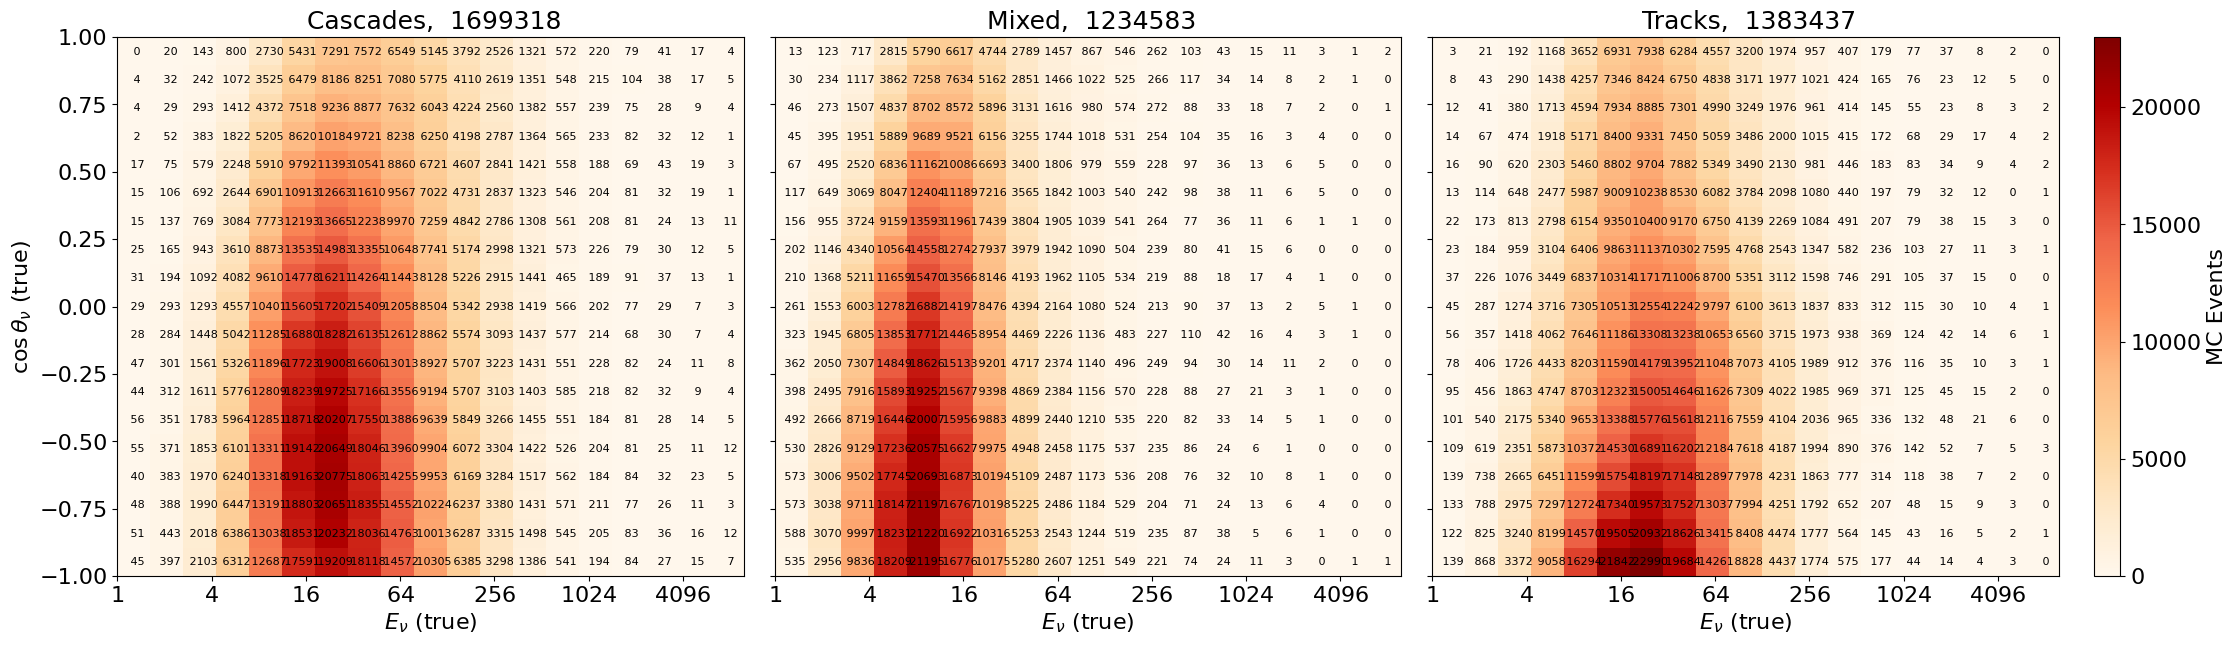

In [9]:
fig, axes = plt.subplots(1,3, figsize = (30,7),sharey=True)
fig.subplots_adjust(wspace=0.05 )


#binning 

H_list = []
X_list = []
Y_list = []

for i in range(len(axes)):
    df = nu_analysis_df[pid_cut[i]]
    H, xedges, yedges, fig = plt.hist2d(df['true_energy'], df['true_coszen'], 
            bins = [En_edge, CT_edge],  cmap='OrRd')
    X, Y = np.meshgrid(xedges, yedges)
    
    H_list.append(H)
    X_list.append(X)
    Y_list.append(Y)
    

vmax = np.max(H_list)
vmin = 0

# plotting

for i in range(len(axes)):
    
    pc = axes[i].pcolormesh(X_list[i], Y_list[i], H_list[i].T, vmin=vmin, vmax=vmax, cmap='OrRd')
    axes[i].set_xscale("log",  base=2)
    formatter = ticker.ScalarFormatter(useMathText=True)
    axes[i].xaxis.set_major_formatter(formatter)
    axes[i].set_xlabel(r'$E_\nu$ (true)')
    axes[i].set_title(f" {pid_name[i]}, {np.sum(H_list[i]): .0f}", fontsize=18)

    # display event on each bin
    
    for j in range( H_list[i].shape[0]): # row (y-axis, costh)
        for k in range( H_list[i].shape[1]): # column (x-axis, En)
            
            x = X_list[i][j][k] + 0.5* (X_list[i][j][k+1] - X_list[i][j][k])
            y = Y_list[i][j][k] + 0.5* (Y_list[i][j+1][k] - Y_list[i][j][k])
            axes[i].text(x, y,  f"{H_list[i].T[j][k]: .0f}", ha='center', va='center',fontsize=8)

axes[0].set_ylabel(r'$\cos\theta_\nu$ (true)')

cbar = plt.colorbar(pc, ax=axes.ravel().tolist(), pad=0.015, label = "MC Events")

np.sum(H_list), np.min(H_list)

plt.savefig('Inelast_Plots/FLERCNN_plots/MC_Compare/true_EvsCosvsPID_2D.png')

# MC events in the plane of ($E$ (reco.), $\cos\theta$ (reco.))

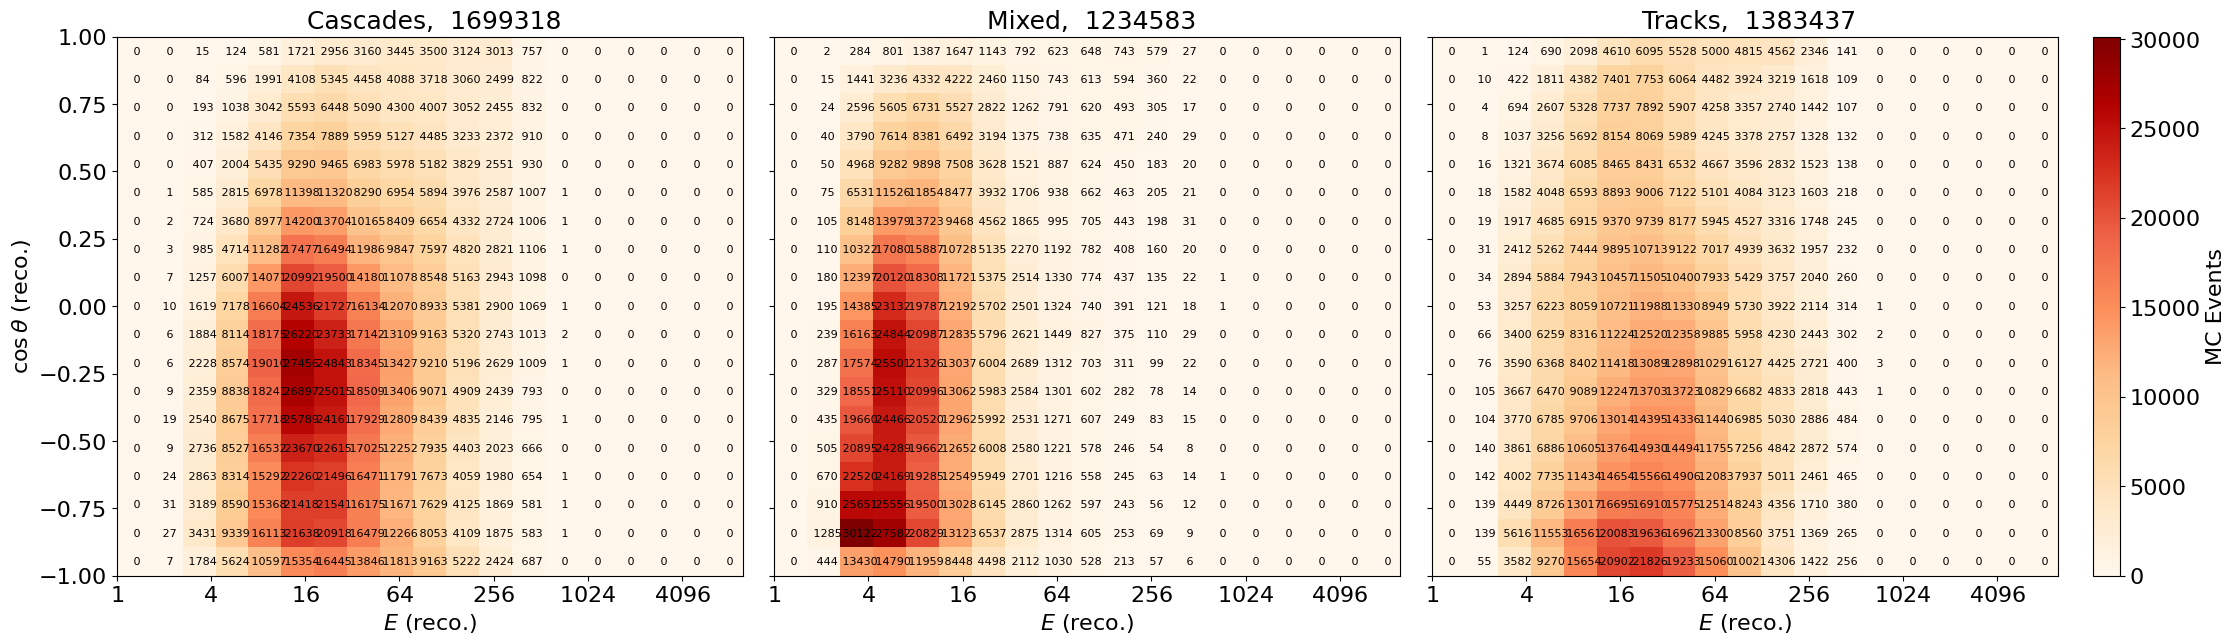

In [10]:
fig, axes = plt.subplots(1,3, figsize = (30,7),sharey=True)
fig.subplots_adjust(wspace=0.05 )


#binning 

H_list = []
X_list = []
Y_list = []

for i in range(len(axes)):
    df = nu_analysis_df[pid_cut[i]]
    H, xedges, yedges, fig = plt.hist2d(df['reco_energy'], df['reco_coszen'], 
            bins = [En_edge, CT_edge],  cmap='OrRd')
    X, Y = np.meshgrid(xedges, yedges)
    
    H_list.append(H)
    X_list.append(X)
    Y_list.append(Y)
    

vmax = np.max(H_list)
vmin = 0

# plotting

for i in range(len(axes)):
    
    pc = axes[i].pcolormesh(X_list[i], Y_list[i], H_list[i].T, vmin=vmin, vmax=vmax, cmap='OrRd')
    axes[i].set_xscale("log",  base=2)
    formatter = ticker.ScalarFormatter(useMathText=True)
    axes[i].xaxis.set_major_formatter(formatter)
    axes[i].set_xlabel(r'$E$ (reco.)')
    axes[i].set_title(f" {pid_name[i]}, {np.sum(H_list[i]): .0f}", fontsize=18)

    # display event on each bin
    
    for j in range( H_list[i].shape[0]): # row (y-axis, costh)
        for k in range( H_list[i].shape[1]): # column (x-axis, En)
            
            x = X_list[i][j][k] + 0.5* (X_list[i][j][k+1] - X_list[i][j][k])
            y = Y_list[i][j][k] + 0.5* (Y_list[i][j+1][k] - Y_list[i][j][k])
            axes[i].text(x, y,  f"{H_list[i].T[j][k]: .0f}", ha='center', va='center',fontsize=8)

    
axes[0].set_ylabel(r'$\cos\theta$ (reco.)')

cbar = plt.colorbar(pc, ax=axes.ravel().tolist(), pad=0.015, label = "MC Events")

np.sum(H_list), np.min(H_list)

plt.savefig('Inelast_Plots/FLERCNN_plots/MC_Compare/reco_EvsCosvsPID_2D.png')

# Expected events in the plane of ($E_\nu$ (true), $\cos\theta_\nu$ (true))

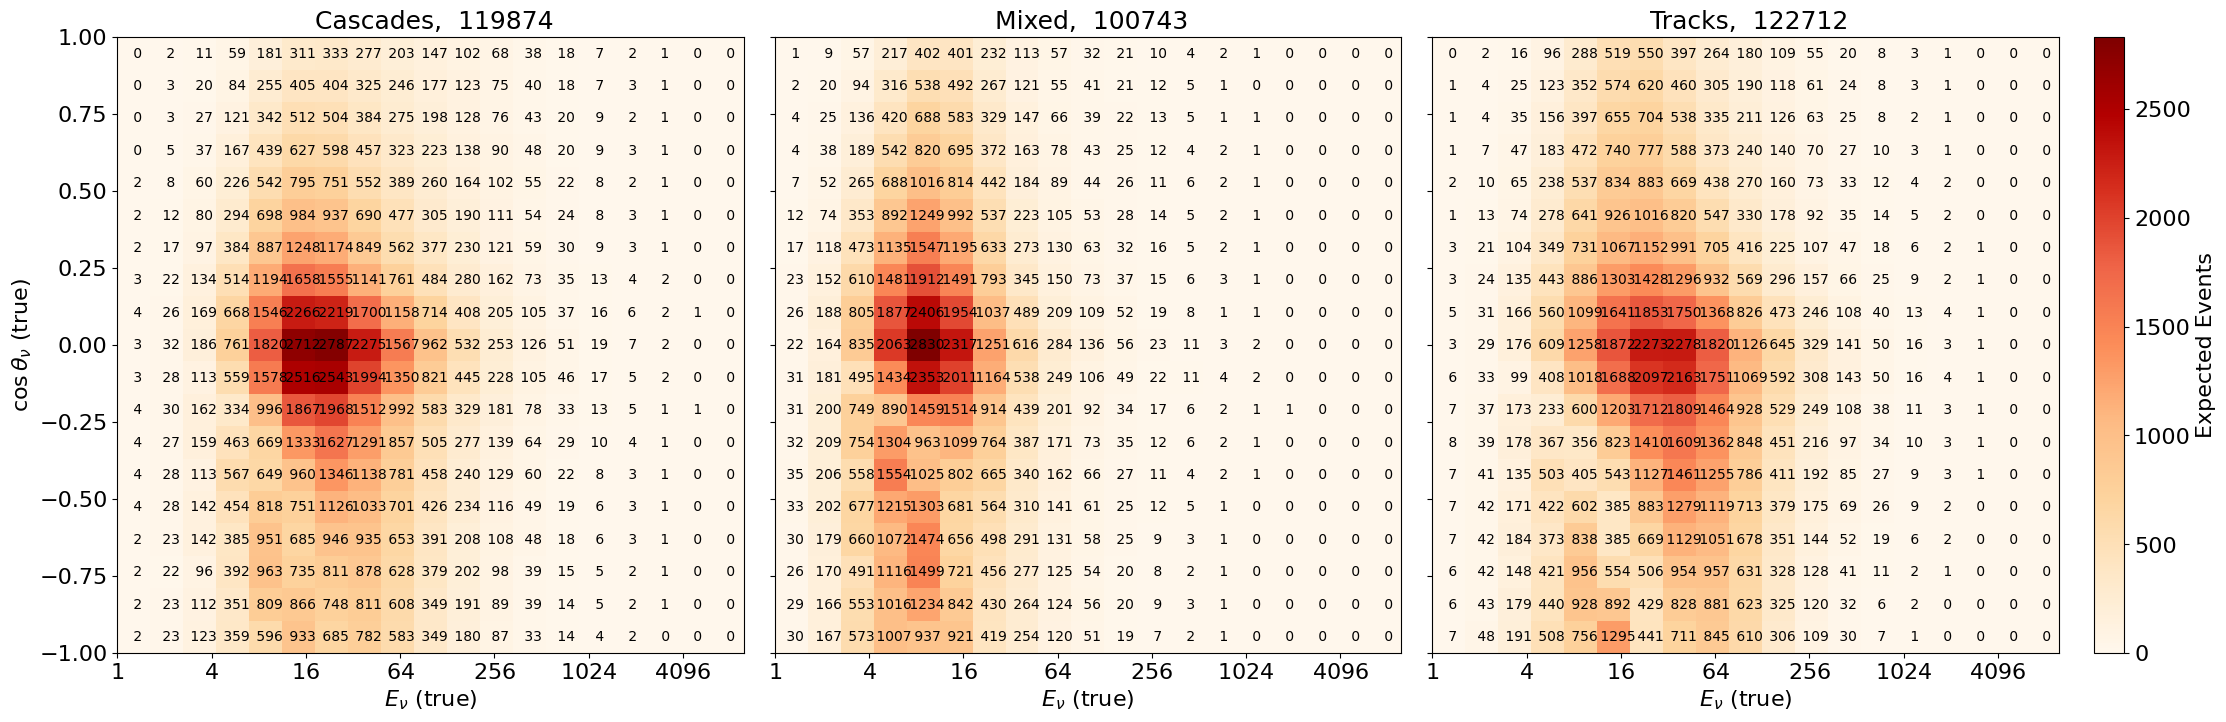

In [11]:
fig, axes = plt.subplots(1,3, figsize = (30,8),sharey=True)
fig.subplots_adjust(wspace=0.05 )


#binning 

H_list = []
X_list = []
Y_list = []

for i in range(len(axes)):
    df = nu_analysis_df[pid_cut[i]]
    H, xedges, yedges, fig = plt.hist2d(df['true_energy'], df['true_coszen'], 
            bins = [En_edge, CT_edge],  cmap='OrRd',  weights=df["ReferenceWeight"]*time)
    X, Y = np.meshgrid(xedges, yedges)
    
    H_list.append(H)
    X_list.append(X)
    Y_list.append(Y)
    

vmax = np.max(H_list)
vmin = 0

# plotting

for i in range(len(axes)):
    
    pc = axes[i].pcolormesh(X_list[i], Y_list[i], H_list[i].T, vmin=vmin, vmax=vmax, cmap='OrRd')
    axes[i].set_xscale("log",  base=2)
    formatter = ticker.ScalarFormatter(useMathText=True)
    axes[i].xaxis.set_major_formatter(formatter)
    axes[i].set_xlabel(r'$E_\nu$ (true)')
    axes[i].set_title(f" {pid_name[i]}, {np.sum(H_list[i]): .0f}", fontsize=18)
    
    # display event on each bin
    
    for j in range( H_list[i].shape[0]): # row (y-axis, costh)
        for k in range( H_list[i].shape[1]): # column (x-axis, En)
            
            x = X_list[i][j][k] + 0.5* (X_list[i][j][k+1] - X_list[i][j][k])
            y = Y_list[i][j][k] + 0.5* (Y_list[i][j+1][k] - Y_list[i][j][k])
            axes[i].text(x, y,  f"{H_list[i].T[j][k]: .0f}", ha='center', va='center',fontsize=10)

axes[0].set_ylabel(r'$\cos\theta_\nu$ (true)')

cbar = plt.colorbar(pc, ax=axes.ravel().tolist(), pad=0.015, label = "Expected Events")

np.sum(H_list)

plt.savefig('Inelast_Plots/FLERCNN_plots/MC_Compare/true_EvsCosvsPID_refweighted_2D.png')

# Expected events in the plane of ($E$ (reco.), $\cos\theta$ (reco.))

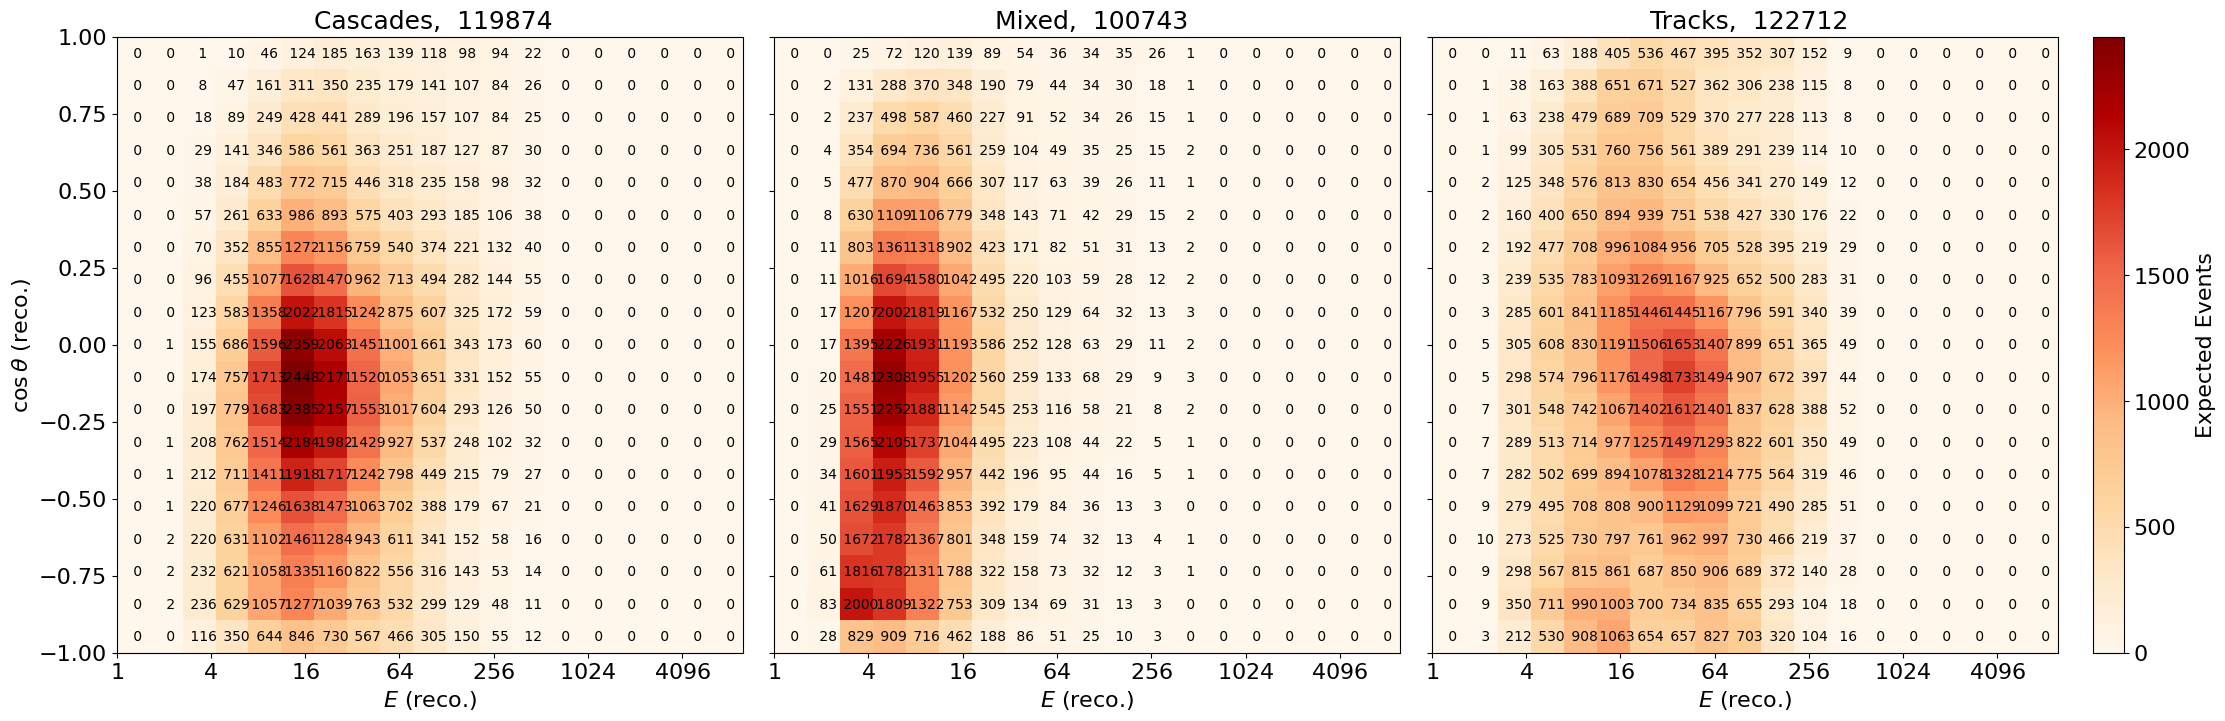

In [12]:

fig, axes = plt.subplots(1,3, figsize = (30,8),sharey=True)
fig.subplots_adjust(wspace=0.05 )


#binning 

H_list = []
X_list = []
Y_list = []

for i in range(len(axes)):
    df = nu_analysis_df[pid_cut[i]]
    H, xedges, yedges, fig = plt.hist2d(df['reco_energy'], df['reco_coszen'], 
            bins = [En_edge, CT_edge],  cmap='OrRd',  weights=df["ReferenceWeight"]*time)
    X, Y = np.meshgrid(xedges, yedges)
    
    H_list.append(H)
    X_list.append(X)
    Y_list.append(Y)
    

vmax = np.max(H_list)
vmin = 0

# plotting

for i in range(len(axes)):
    
    pc = axes[i].pcolormesh(X_list[i], Y_list[i], H_list[i].T, vmin=vmin, vmax=vmax, cmap='OrRd')
    axes[i].set_xscale("log",  base=2)
    formatter = ticker.ScalarFormatter(useMathText=True)
    axes[i].xaxis.set_major_formatter(formatter)
    axes[i].set_xlabel(r'$E$ (reco.)')
    axes[i].set_title(f" {pid_name[i]}, {np.sum(H_list[i]): .0f}", fontsize=18)
    
    # display event on each bin
    
    for j in range( H_list[i].shape[0]): # row (y-axis, costh)
        for k in range( H_list[i].shape[1]): # column (x-axis, En)
            
            x = X_list[i][j][k] + 0.5* (X_list[i][j][k+1] - X_list[i][j][k])
            y = Y_list[i][j][k] + 0.5* (Y_list[i][j+1][k] - Y_list[i][j][k])
            axes[i].text(x, y,  f"{H_list[i].T[j][k]: .0f}", ha='center', va='center',fontsize=10)


axes[0].set_ylabel(r'$\cos\theta$ (reco.)')

cbar = plt.colorbar(pc, ax=axes.ravel().tolist(), pad=0.015, label = "Expected Events")

np.sum(H_list)

plt.savefig('Inelast_Plots/FLERCNN_plots/MC_Compare/reco_EvsCosvsPID_refweighted_2D.png')

# CNN2D

In [13]:
import h5py as hdf

inelast_filenames ={'e':'FLERCNN_plus_121151.h5'
            ,'mu':'FLERCNN_plus_141154.h5'
            ,'tau':'FLERCNN_plus_161151.h5'}

folder = '/afs/ifh.de/user/a/akumar/lustre/data/oscNext/flercnn_sample_inelasticity/'
hdf_inel_e = hdf.File(folder+inelast_filenames['e'],'r')
hdf_inel_mu = hdf.File(folder+inelast_filenames['mu'],'r')
hdf_inel_tau = hdf.File(folder+inelast_filenames['tau'],'r')

In [14]:
PID_CNN2D=np.array(list(hdf_inel_e['reco_PID'][1:])+list(hdf_inel_mu['reco_PID'][1:])+list(hdf_inel_tau['reco_PID'][1:]))
reco_E_CNN2D=np.array(list(hdf_inel_e['reco_energy'][1:])+list(hdf_inel_mu['reco_energy'][1:])+list(hdf_inel_tau['reco_energy'][1:]))
true_E_CNN2D=np.array(list(hdf_inel_e['true_energy'][1:])+list(hdf_inel_mu['true_energy'][1:])+list(hdf_inel_tau['true_energy'][1:]))
reco_coszen_CNN2D=np.array(list(hdf_inel_e['reco_coszen'][1:])+list(hdf_inel_mu['reco_coszen'][1:])+list(hdf_inel_tau['reco_coszen'][1:]))
true_coszen_CNN2D=np.array(list(hdf_inel_e['true_coszen'][1:])+list(hdf_inel_mu['true_coszen'][1:])+list(hdf_inel_tau['true_coszen'][1:]))

In [15]:
pdg_code_CNN2D=np.array(list(hdf_inel_e['pdg_code'][1:])+list(hdf_inel_mu['pdg_code'][1:])+list(hdf_inel_tau['pdg_code'][1:]))

In [16]:
def getfluxnumus(trueenergy,truecoszen,weightedaeff):
    #numu
    weightsnumu=fluxweights(trueenergy,truecoszen,1,weightedaeff)[1]
    #numubar
    weightsnumubar=fluxweights(trueenergy,truecoszen,-1,weightedaeff)[1]
    return np.array([weightsnumu,weightsnumubar])

In [17]:
makefluxweights = True

if makefluxweights == True:
    
    from neutrino_weighter_new_PISA import GENIENeutrinoWeighter
    fluxweights = GENIENeutrinoWeighter()

    Es=np.geomspace(1,10000,100)
    coss=np.linspace(-1,1,100)
    test0 = np.zeros((100,100))
    test1 = np.zeros((100,100))
    for i,E in enumerate(Es):
        test0[i,:],test1[i,:]=getfluxnumus(E*np.ones(len(Es)),coss,np.ones(len(Es)));

<< PISA is running in double precision (FP64) mode; numba is running on CPU (single core) >>


Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculat

from scipy.interpolate import interp2d
s0=interp2d(Es,coss,test0)
s1=interp2d(Es,coss,test1)
stuff0=s0(true_E_CNN2D,true_coszen_CNN2D)
stuff1=s1(true_E_CNN2D,true_coszen_CNN2D)
weights_cnn2d=np.where(pdg_code_CNN2D>0,stuff0,stuff1)

In [18]:
len(true_E_CNN2D)

4415145

In [19]:
# Defining PID cuts

track_cut1 = (PID_CNN2D > PID_edge[2]) & (PID_CNN2D <= PID_edge[3])
cascade_cut1 = (PID_CNN2D <= PID_edge[1]) 
mixed_cut1 = (PID_CNN2D > PID_edge[1]) & (PID_CNN2D <= PID_edge[2])

pid_cut1=[cascade_cut1, mixed_cut1, track_cut1]
pid_name = ["Cascades", "Mixed", "Tracks"]

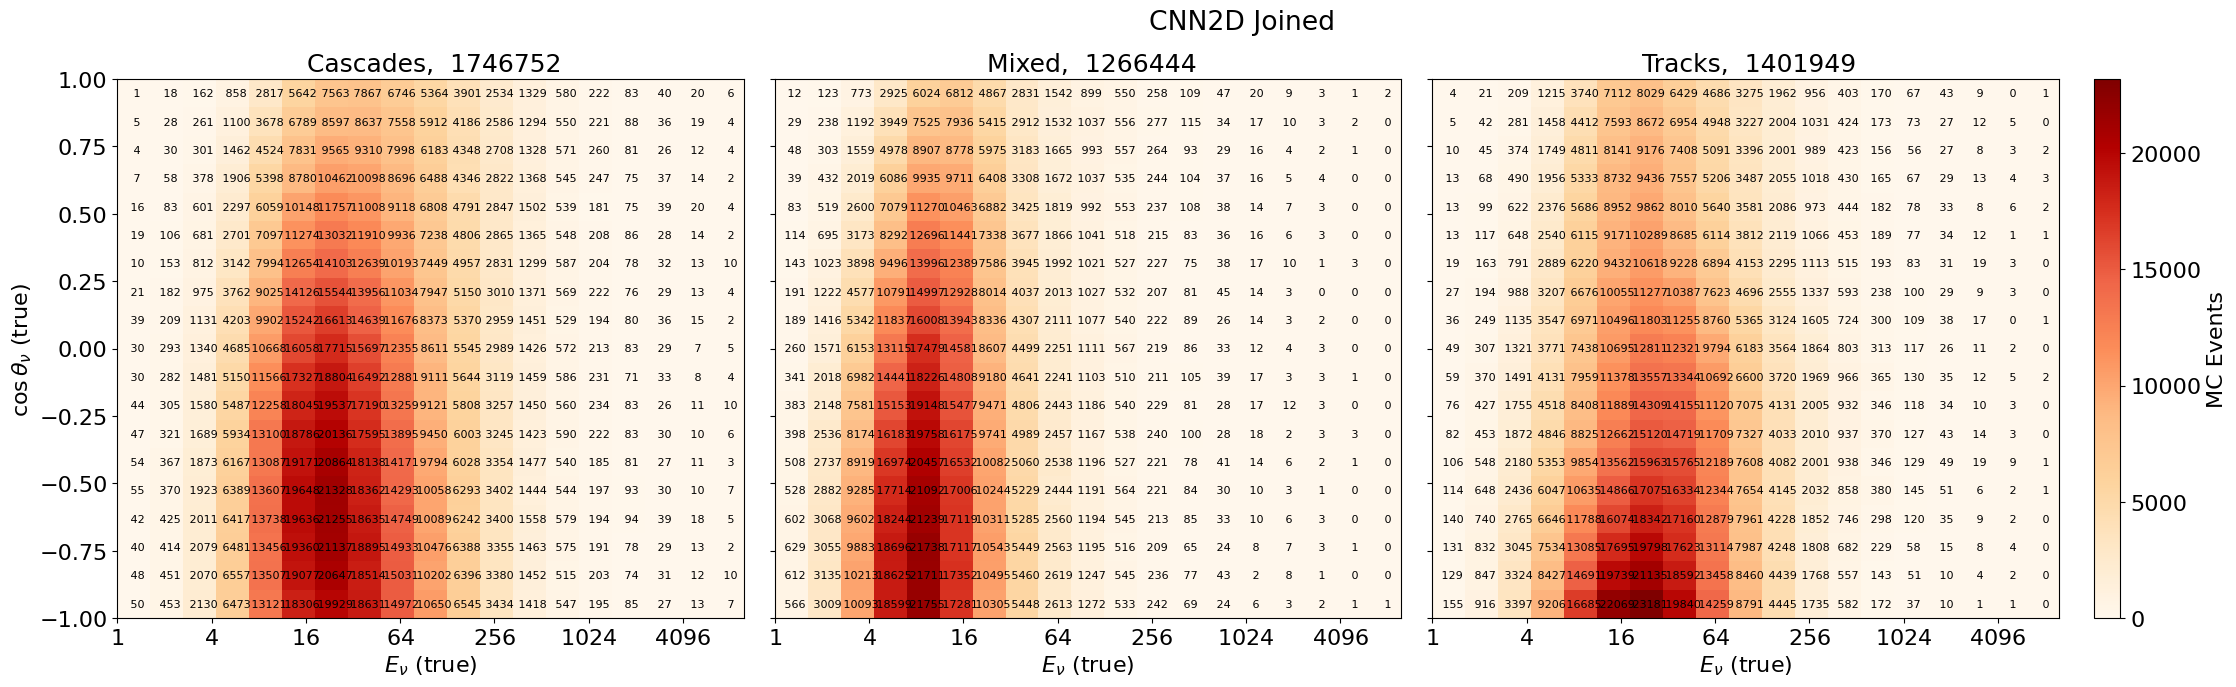

In [20]:
fig, axes = plt.subplots(1,3, figsize = (30,7),sharey=True)
fig.subplots_adjust(wspace=0.05 )


#binning 

H_list = []
X_list = []
Y_list = []

for i in range(len(axes)):
    H, xedges, yedges, fig = plt.hist2d(true_E_CNN2D[pid_cut1[i]], true_coszen_CNN2D[pid_cut1[i]], 
            bins = [En_edge, CT_edge],  cmap='OrRd')
    X, Y = np.meshgrid(xedges, yedges)
    
    H_list.append(H)
    X_list.append(X)
    Y_list.append(Y)
    

vmax = np.max(H_list)
vmin = 0

# plotting

for i in range(len(axes)):
    
    pc = axes[i].pcolormesh(X_list[i], Y_list[i], H_list[i].T, vmin=vmin, vmax=vmax, cmap='OrRd')
    axes[i].set_xscale("log",  base=2)
    formatter = ticker.ScalarFormatter(useMathText=True)
    axes[i].xaxis.set_major_formatter(formatter)
    axes[i].set_xlabel(r'$E_\nu$ (true)')
    axes[i].set_title(f" {pid_name[i]}, {np.sum(H_list[i]): .0f}", fontsize=18)

    # display event on each bin
    
    for j in range( H_list[i].shape[0]): # row (y-axis, costh)
        for k in range( H_list[i].shape[1]): # column (x-axis, En)
            
            x = X_list[i][j][k] + 0.5* (X_list[i][j][k+1] - X_list[i][j][k])
            y = Y_list[i][j][k] + 0.5* (Y_list[i][j+1][k] - Y_list[i][j][k])
            axes[i].text(x, y,  f"{H_list[i].T[j][k]: .0f}", ha='center', va='center',fontsize=8)

axes[0].set_ylabel(r'$\cos\theta_\nu$ (true)')

cbar = plt.colorbar(pc, ax=axes.ravel().tolist(), pad=0.015, label = "MC Events")

np.sum(H_list), np.min(H_list)

plt.suptitle('CNN2D Joined')
plt.savefig('Inelast_Plots/FLERCNN_plots/MC_Compare/true_EvsCosvsPID_2D_CNN2D.png')

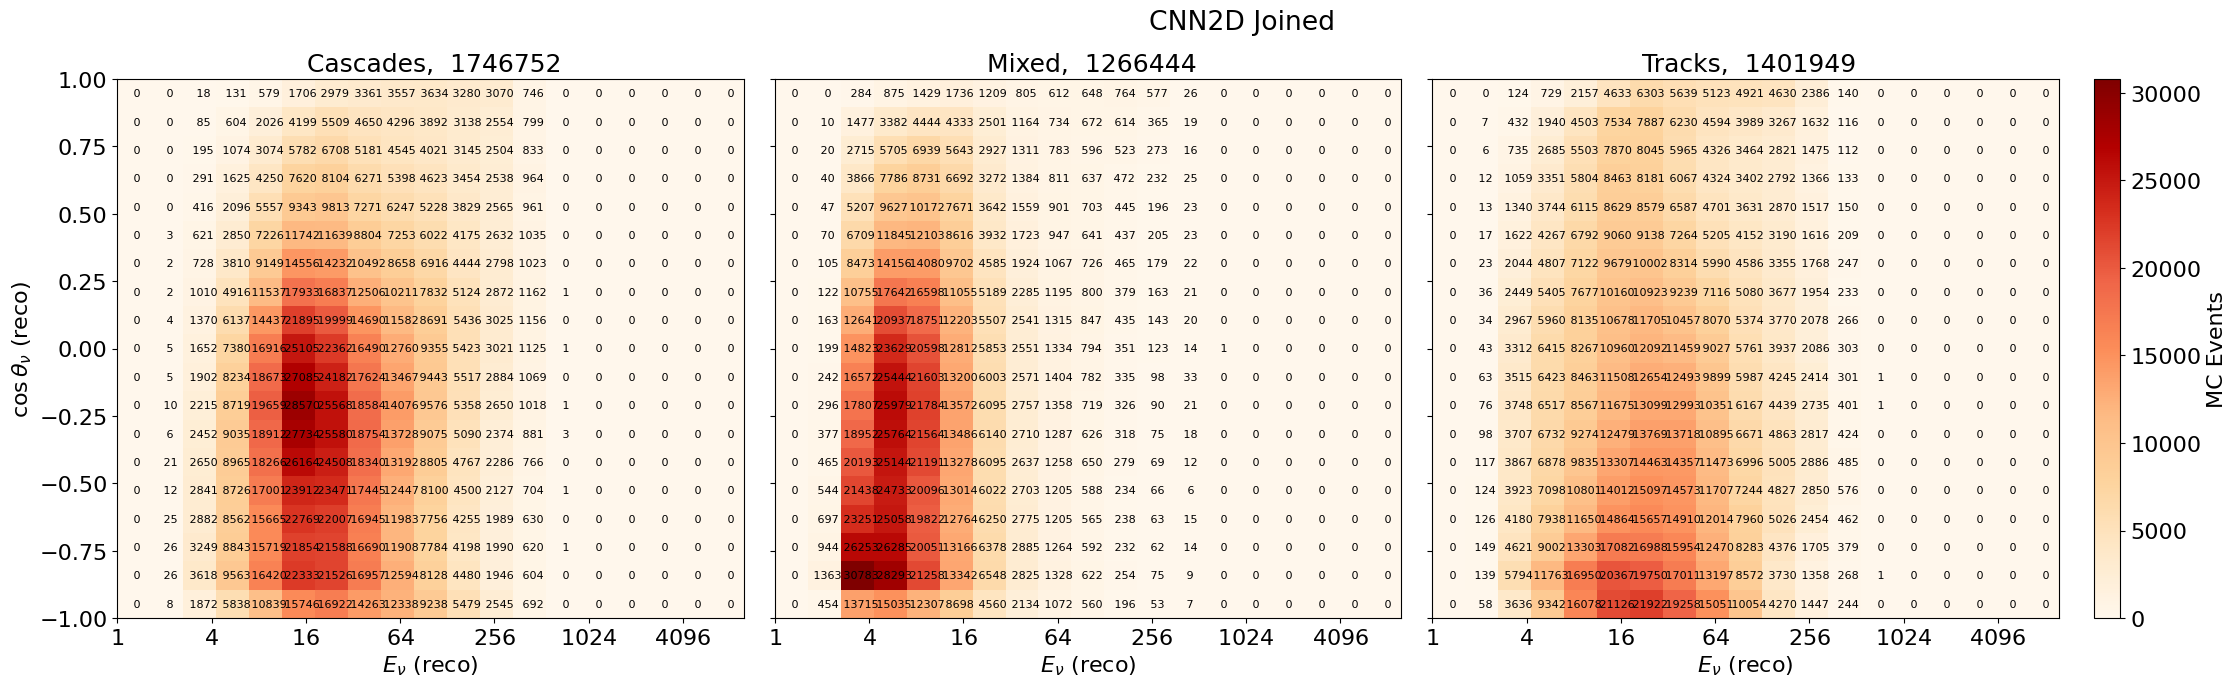

In [21]:
fig, axes = plt.subplots(1,3, figsize = (30,7),sharey=True)
fig.subplots_adjust(wspace=0.05 )


#binning 

H_list = []
X_list = []
Y_list = []

for i in range(len(axes)):
    H, xedges, yedges, fig = plt.hist2d(reco_E_CNN2D[pid_cut1[i]], reco_coszen_CNN2D[pid_cut1[i]], 
            bins = [En_edge, CT_edge],  cmap='OrRd')
    X, Y = np.meshgrid(xedges, yedges)
    
    H_list.append(H)
    X_list.append(X)
    Y_list.append(Y)
    

vmax = np.max(H_list)
vmin = 0

# plotting

for i in range(len(axes)):
    
    pc = axes[i].pcolormesh(X_list[i], Y_list[i], H_list[i].T, vmin=vmin, vmax=vmax, cmap='OrRd')
    axes[i].set_xscale("log",  base=2)
    formatter = ticker.ScalarFormatter(useMathText=True)
    axes[i].xaxis.set_major_formatter(formatter)
    axes[i].set_xlabel(r'$E_\nu$ (reco)')
    axes[i].set_title(f" {pid_name[i]}, {np.sum(H_list[i]): .0f}", fontsize=18)

    # display event on each bin
    
    for j in range( H_list[i].shape[0]): # row (y-axis, costh)
        for k in range( H_list[i].shape[1]): # column (x-axis, En)
            
            x = X_list[i][j][k] + 0.5* (X_list[i][j][k+1] - X_list[i][j][k])
            y = Y_list[i][j][k] + 0.5* (Y_list[i][j+1][k] - Y_list[i][j][k])
            axes[i].text(x, y,  f"{H_list[i].T[j][k]: .0f}", ha='center', va='center',fontsize=8)

axes[0].set_ylabel(r'$\cos\theta_\nu$ (reco)')

cbar = plt.colorbar(pc, ax=axes.ravel().tolist(), pad=0.015, label = "MC Events")

np.sum(H_list), np.min(H_list)

plt.suptitle('CNN2D Joined')
plt.savefig('Inelast_Plots/FLERCNN_plots/MC_Compare/reco_EvsCosvsPID_2D_CNN2D.png')

## FLERCNN to CNN2D equivalent only for numu (e.g 1154 Geant4 prop. muons). No equivalent file for nue and nutau thus the mismatch in total events (due to nue,nutau differences)!